# Spotify Music Analytics & Data Visualization

## Introduction
This project analyzes a real-world Spotify dataset to understand how musical
characteristics and popularity vary across genres and over time. Using data
visualization techniques, we explore patterns, relationships, and trends in
audio features such as danceability, energy, tempo, and valence.

The goal is to answer analytical questions through visualizations and build
a compelling data-driven story.



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("spotify_tracks.csv")

# Preview
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [9]:
## Initial Data Exploration
df.shape


(114000, 21)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [11]:
df.describe()


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [12]:
## Data Cleaning & Preprocessing
df = df.drop_duplicates()


In [13]:
df.isnull().sum()


,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [14]:
# Drop rows with missing popularity or genre
df = df.dropna(subset=["popularity", "track_genre"])

# Fill remaining numerical NaNs with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [15]:
# Keep popularity between 0 and 100
df = df[(df["popularity"] >= 0) & (df["popularity"] <= 100)]


In [16]:
top_genres = df["track_genre"].value_counts().nlargest(10).index
df = df[df["track_genre"].isin(top_genres)]


### Cleaning Summary
- Removed duplicate records
- Handled missing values
- Filtered invalid popularity values
- Focused analysis on top 10 genres for clarity


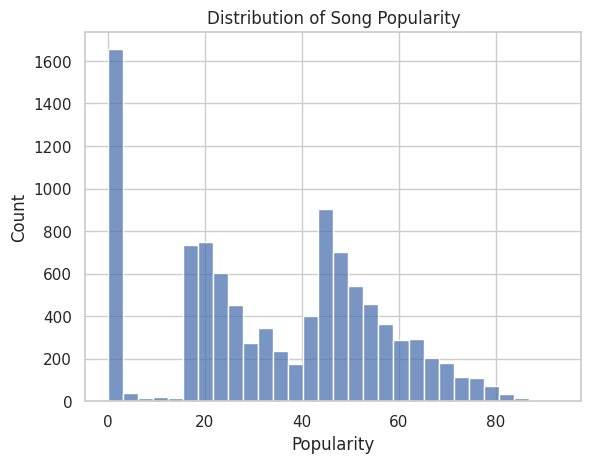

In [18]:
## Analytical Questions & Visualizations
### Q1. What is the distribution of song popularity?
plt.figure()
sns.histplot(df["popularity"], bins=30)
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()


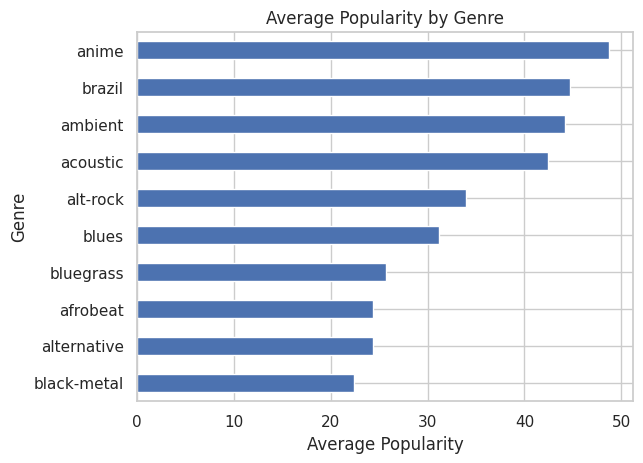

In [19]:
### Q2. Which genres are most popular on average?
plt.figure()
genre_pop = df.groupby("track_genre")["popularity"].mean().sort_values()
genre_pop.plot(kind="barh")
plt.title("Average Popularity by Genre")
plt.xlabel("Average Popularity")
plt.ylabel("Genre")
plt.show()


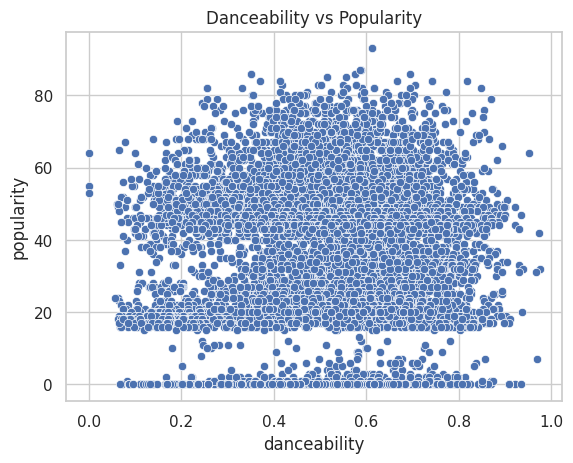

In [37]:
### Q3. How does danceability relate to popularity?
plt.figure()
sns.scatterplot(data=df, x="danceability", y="popularity")
plt.title("Danceability vs Popularity")
plt.show()



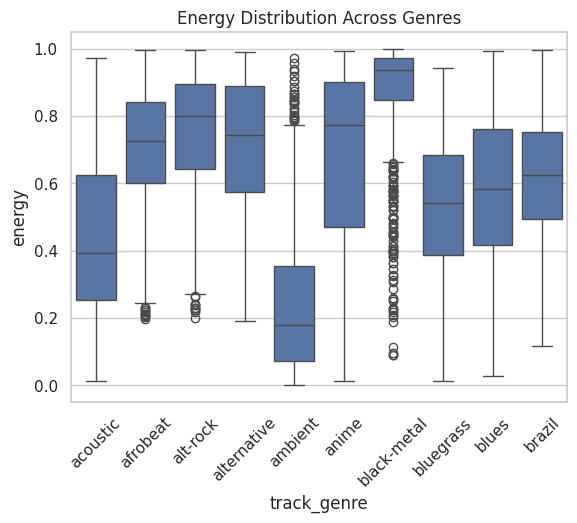

In [21]:
### Q4. How does energy differ across genres?
plt.figure()
sns.boxplot(data=df, x="track_genre", y="energy")
plt.xticks(rotation=45)
plt.title("Energy Distribution Across Genres")
plt.show()


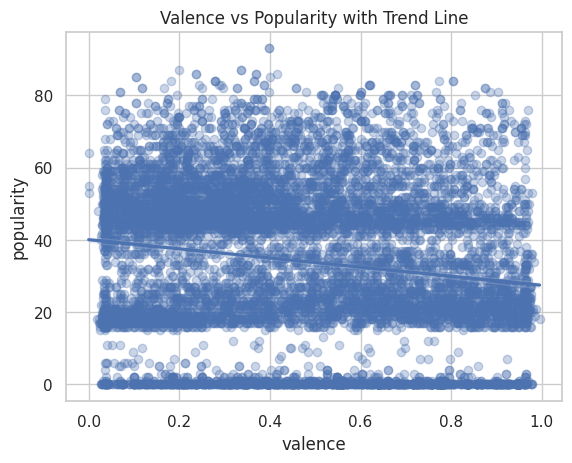

In [34]:
### Q5. Are happier songs (valence) more popular?
plt.figure()
sns.regplot(data=df, x="valence", y="popularity", scatter_kws={"alpha":0.3})
plt.title("Valence vs Popularity with Trend Line")
plt.show()



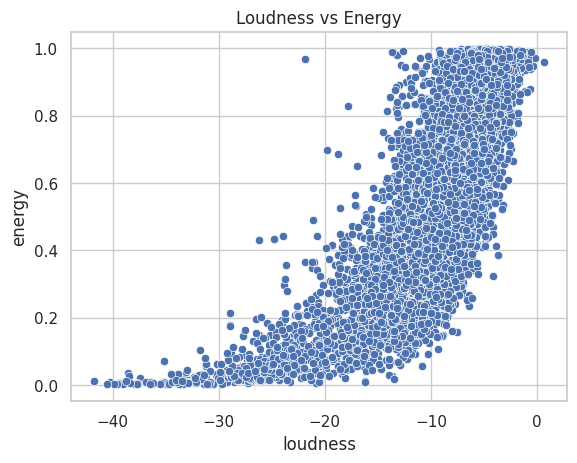

In [31]:
### Q6. What is the relationship between loudness and energy?
plt.figure()
sns.scatterplot(data=df, x="loudness", y="energy")
plt.title("Loudness vs Energy")
plt.show()


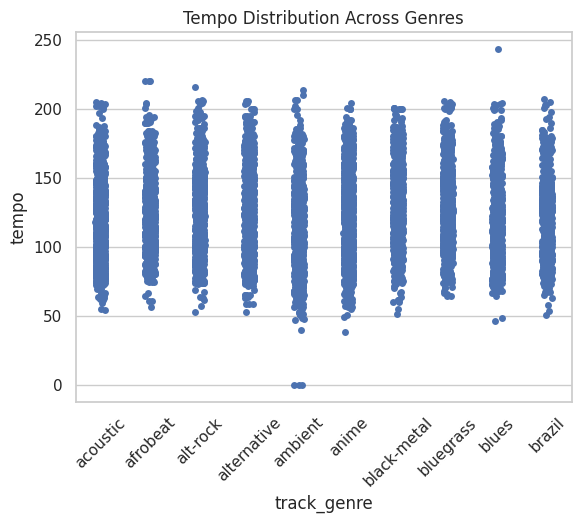

In [38]:
### Q7. How does tempo vary across genres?
plt.figure()
sns.stripplot(data=df, x="track_genre", y="tempo", jitter=True)
plt.xticks(rotation=45)
plt.title("Tempo Distribution Across Genres")
plt.show()


/tmp/ipython-input-3050905859.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("acoustic_bin")["popularity"].mean().plot(kind="bar")


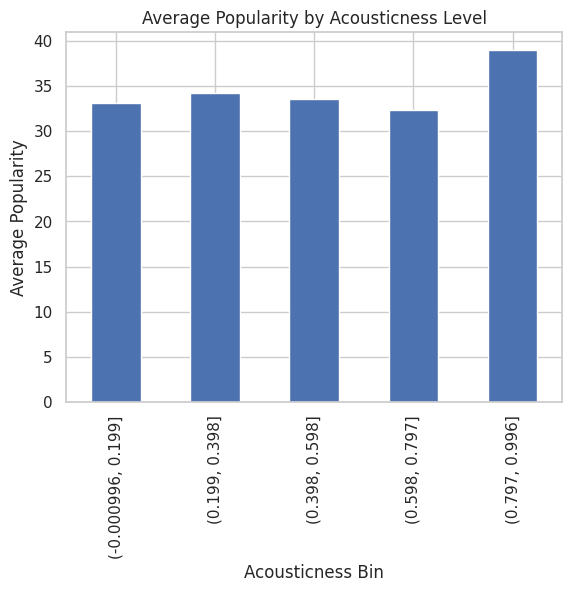

In [33]:
### Q8. Do acoustic songs tend to be less popular?
df["acoustic_bin"] = pd.cut(df["acousticness"], bins=5)

plt.figure()
df.groupby("acoustic_bin")["popularity"].mean().plot(kind="bar")
plt.title("Average Popularity by Acousticness Level")
plt.xlabel("Acousticness Bin")
plt.ylabel("Average Popularity")
plt.show()



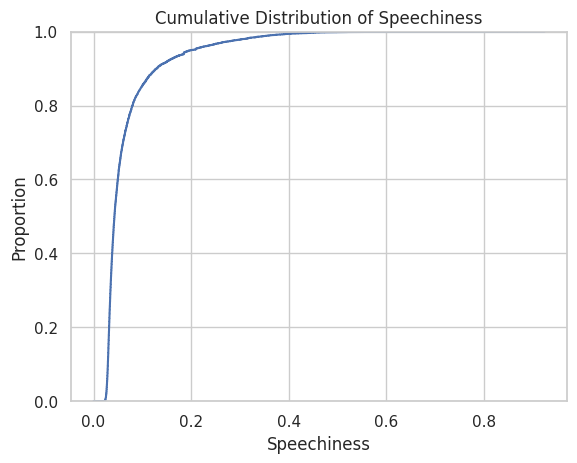

In [32]:
### Q9. How does speechiness relate to popularity?
plt.figure()
sns.ecdfplot(df["speechiness"])
plt.title("Cumulative Distribution of Speechiness")
plt.xlabel("Speechiness")
plt.show()



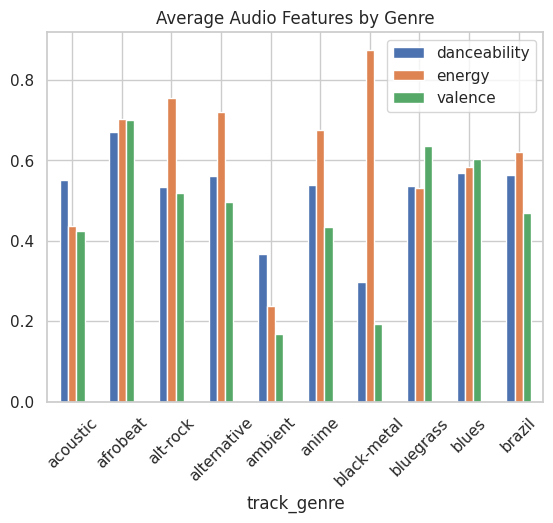

In [27]:
### Q10. How do multiple audio features compare across genres?
features = ["danceability", "energy", "valence"]
genre_features = df.groupby("track_genre")[features].mean()

genre_features.plot(kind="bar")
plt.title("Average Audio Features by Genre")
plt.xticks(rotation=45)
plt.show()


## Key Insights
- Popularity varies significantly across genres
- Danceability and energy show moderate correlation with popularity
- Extremely acoustic or speech-heavy tracks tend to be less popular
## Limitations
- Popularity is Spotify-specific and may not reflect global trends
- Genre classification can overlap
- Dataset does not include listener demographics
## Conclusion
This project demonstrates how audio features and genre influence music popularity
on Spotify. Interactive visual analytics provide valuable insights into modern
music trends and listener preferences.
